# Análisis función Seno

Análisis del cálculo de la función seno utilizando diferentes estrategias de paralelización.

### Imports de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sin X Original

In [2]:
df_ori_easy = pd.read_csv('./datasets/sinx.1.1.csv')
df_ori_hard = pd.read_csv('./datasets/sinx.172635172.1.1.csv')

df_ori_easy.head()

,program,time,threads
0,./sin/sinx,3.626871,1
1,./sin/sinx,3.626204,1
2,./sin/sinx,3.596060,1
3,./sin/sinx,3.594686,1
4,./sin/sinx,3.597102,1


In [3]:
df_ori_easy['time'].median()
df_ori_hard['time'].median()

9.174458622932434

<Axes: >

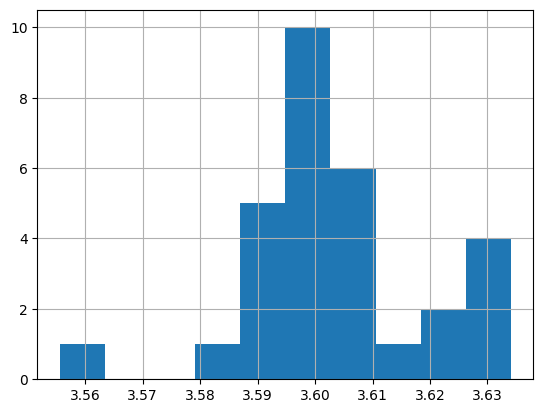

In [4]:
df_ori_easy['time'].hist()

<Axes: >

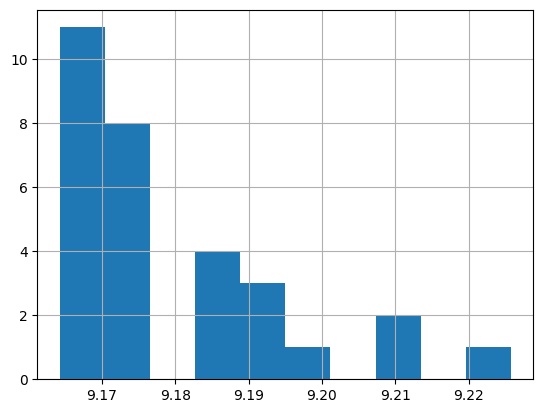

In [5]:
df_ori_hard['time'].hist()

# Sinx con OpenMP

In [6]:
df_p_easy = pd.read_csv('./datasets/sinx-p.1.128.csv')
df_p_hard = pd.read_csv('./datasets/sinx-p.172635172.1.128.csv')

df_p_easy.head()

,program,time,threads
0,./sin/sinx-p,3.584292,1
1,./sin/sinx-p,3.559751,1
2,./sin/sinx-p,3.560107,1
3,./sin/sinx-p,3.557183,1
4,./sin/sinx-p,3.550036,1


In [7]:
df_p_easy_med = df_p_easy.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')
df_p_hard_med = df_p_hard.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')

df_p_easy_med.head()

,threads,time
0,1,3.558467
1,2,2.149546
2,3,1.667112
3,4,1.313581
4,5,1.150548


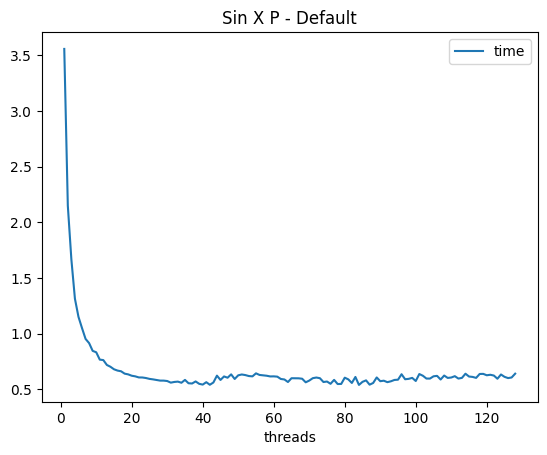

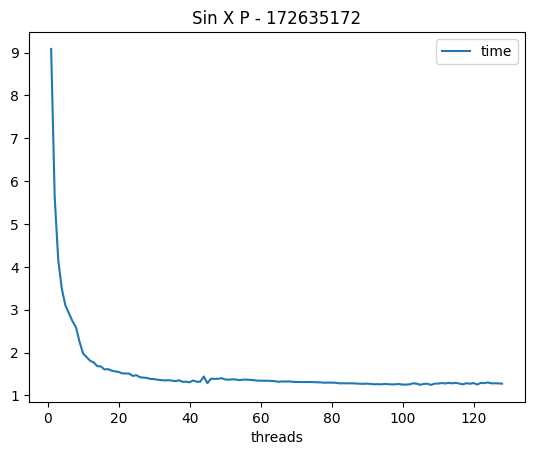

In [8]:
df_p_easy_med.plot(x='threads', y='time', title='Sin X P - Default')
df_p_hard_med.plot(x='threads', y='time', title='Sin X P - 172635172')

plt.show()

### Sin X con Vectorización

In [9]:
df_v_easy = pd.read_csv('./datasets/sinx-v.1.1.csv')
df_v_hard = pd.read_csv('./datasets/sinx-v.172635172.1.1.csv')

df_v_easy.head()

,program,time,threads
0,./sin/sinx-v,3.255066,1
1,./sin/sinx-v,3.262974,1
2,./sin/sinx-v,3.257795,1
3,./sin/sinx-v,3.385269,1
4,./sin/sinx-v,3.221717,1


In [10]:
df_v_easy['time'].median()
df_v_hard['time'].median()

8.22981882095337

In [11]:
df_v_easy = df_v_easy.head(20)
df_v_hard = df_v_hard.head(20)

df_ori_easy = df_ori_easy.head(20)
df_ori_hard = df_ori_hard.head(20)

<Axes: >

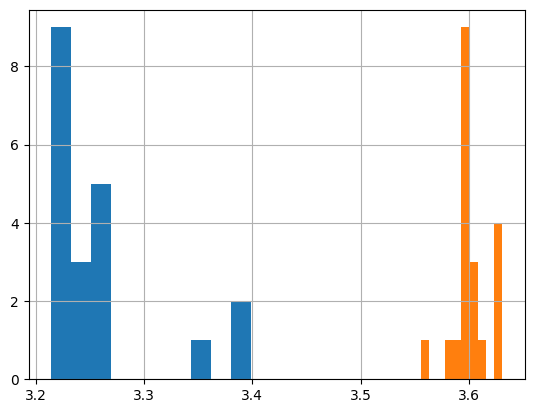

In [12]:
%matplotlib inline

df_v_easy['time'].hist()
df_ori_easy['time'].hist()

<Axes: >

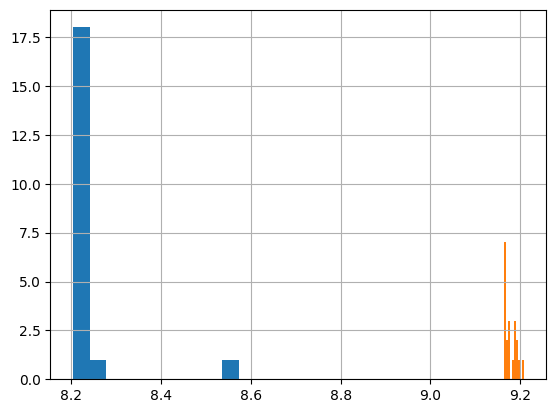

In [13]:
%matplotlib inline

df_v_hard['time'].hist()
df_ori_hard['time'].hist()

### Sin X con Vectorización y Paralelización

In [14]:
df_pv_easy = pd.read_csv('./datasets/sinx-pv.1.128.csv')
df_pv_hard = pd.read_csv('./datasets/sinx-pv.172635172.1.128.csv')

df_pv_easy.head()

,program,time,threads
0,./sin/sinx-pv,3.349914,1
1,./sin/sinx-pv,3.255975,1
2,./sin/sinx-pv,3.266768,1
3,./sin/sinx-pv,3.232034,1
4,./sin/sinx-pv,3.265763,1


In [15]:
df_pv_easy_med = df_pv_easy.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')
df_pv_hard_med = df_pv_hard.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')

df_pv_easy_med.head()

,threads,time
0,1,3.260869
1,2,2.012896
2,3,1.562748
3,4,1.318896
4,5,1.119840


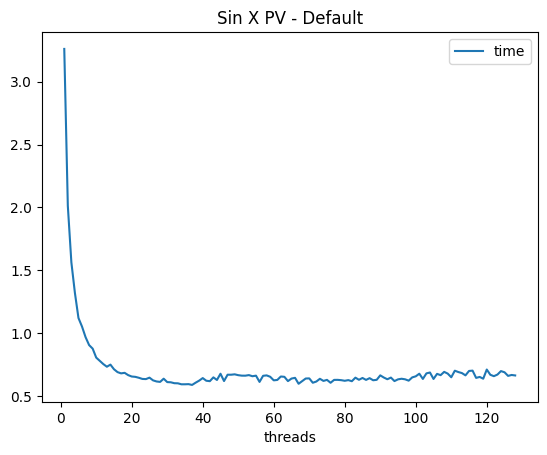

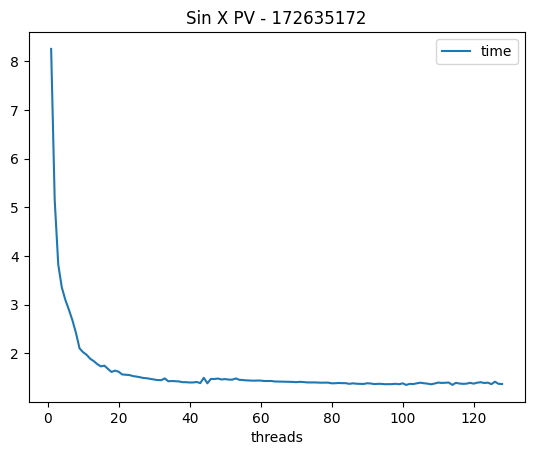

In [16]:
df_pv_easy_med.plot(x='threads', y='time', title='Sin X PV - Default')
df_pv_hard_med.plot(x='threads', y='time', title='Sin X PV - 172635172')

plt.show()

### Sin X PSIM

In [17]:
df_psim_easy = pd.read_csv('./datasets/sinx-psim.1.128.csv')
df_psim_hard = pd.read_csv('./datasets/sinx-psim.172635172.1.128.csv')

df_psim_easy.head()

,program,time,threads
0,./sin/sinx-psim,3.517491,1
1,./sin/sinx-psim,3.554041,1
2,./sin/sinx-psim,3.528621,1
3,./sin/sinx-psim,3.566738,1
4,./sin/sinx-psim,3.565210,1


In [18]:
df_psim_easy_med = df_psim_easy.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')
df_psim_hard_med = df_psim_hard.groupby(['threads'], as_index=True)['time'].median().reset_index(name='time')

df_psim_easy_med.head()

,threads,time
0,1,3.541059
1,2,2.137638
2,3,1.669860
3,4,1.341870
4,5,1.159193


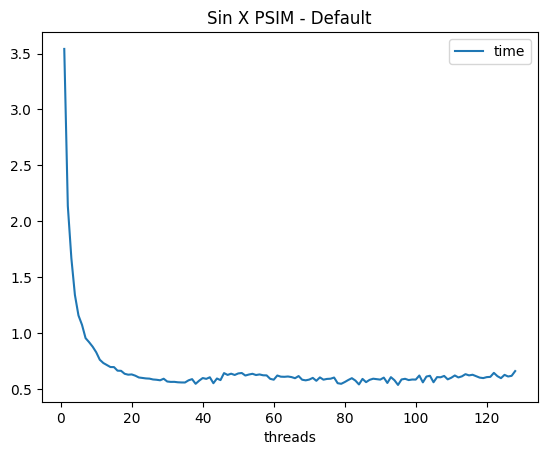

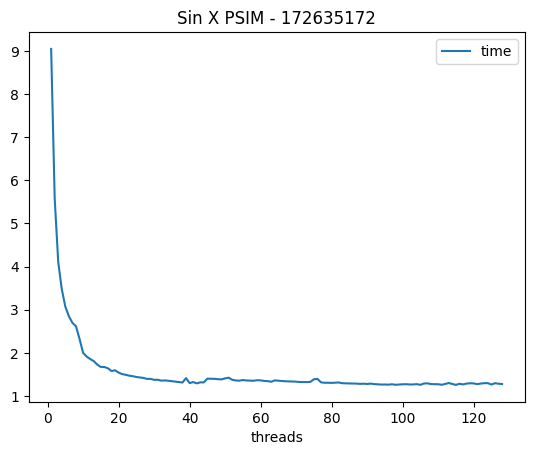

In [19]:
df_psim_easy_med.plot(x='threads', y='time', title='Sin X PSIM - Default')
df_psim_hard_med.plot(x='threads', y='time', title='Sin X PSIM - 172635172')

plt.show()

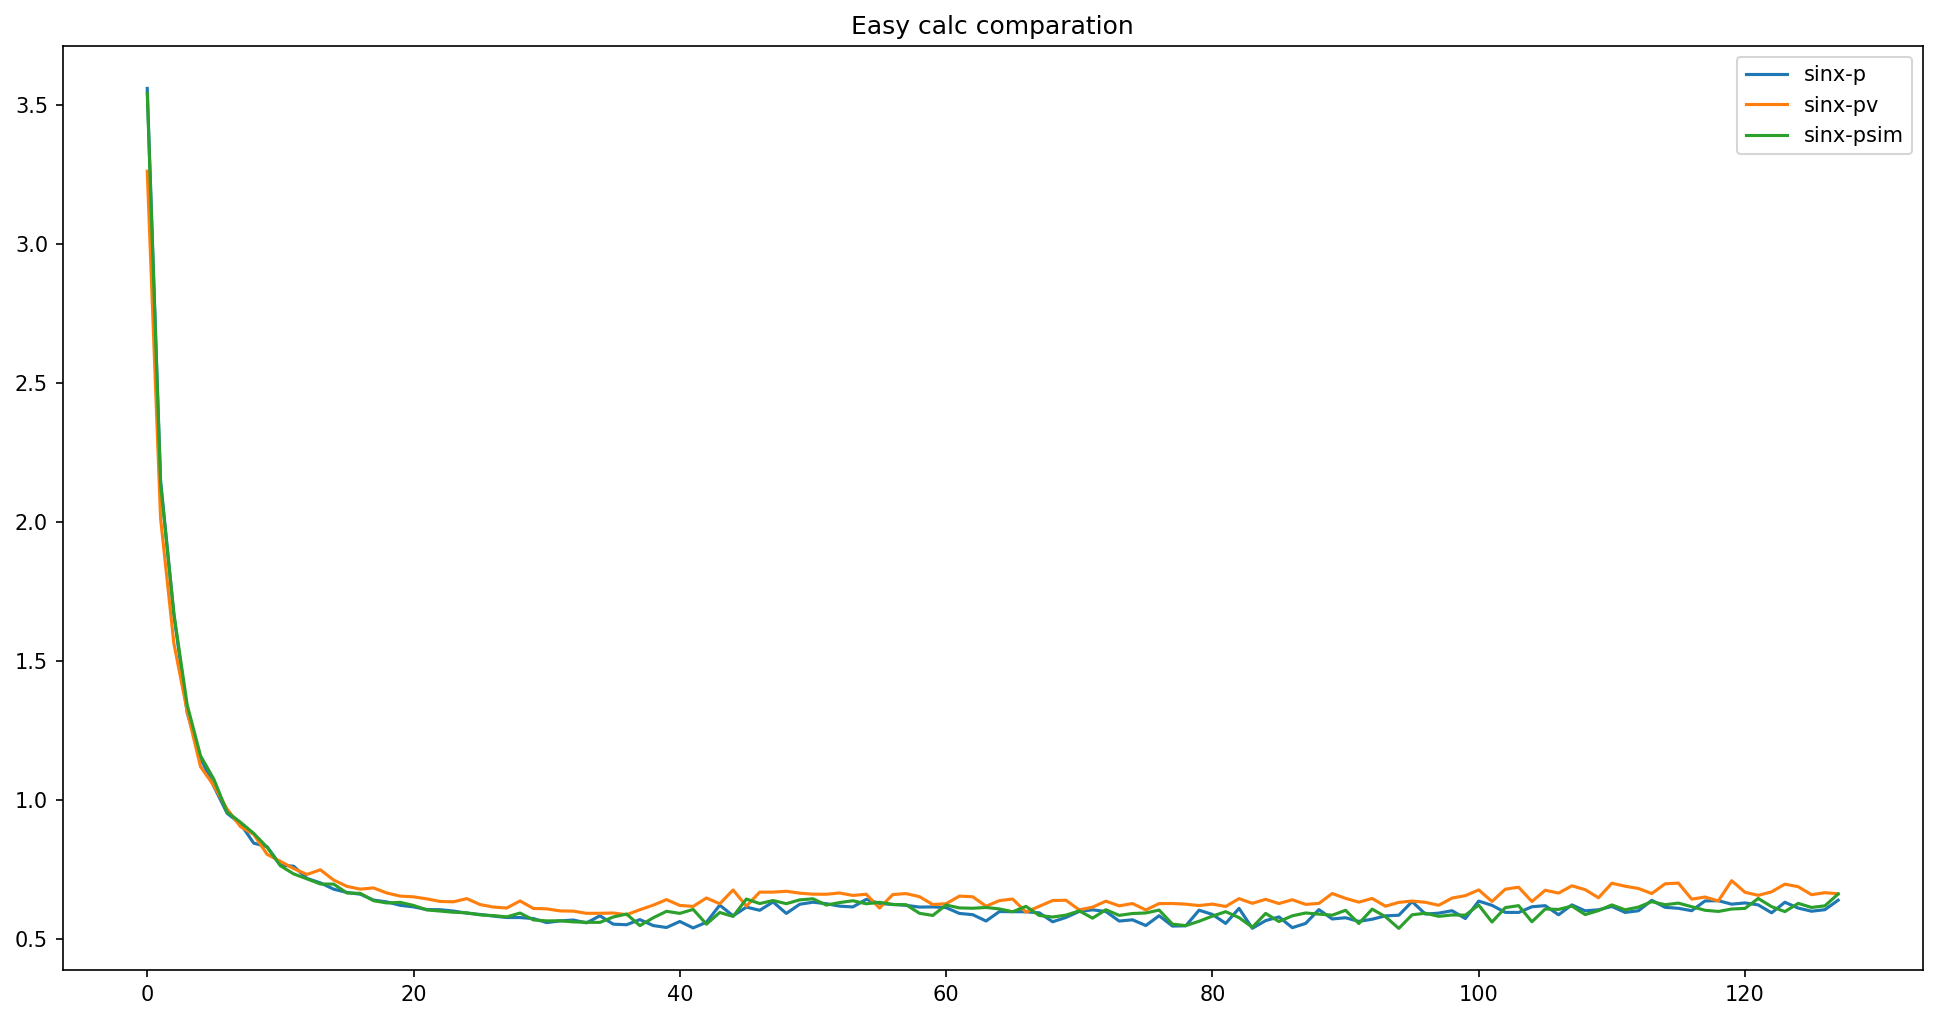

In [20]:
plt.figure(figsize=(16, 8), dpi=150)

df_p_easy_med['time'].plot(label='sinx-p')
df_pv_easy_med['time'].plot(label='sinx-pv')
df_psim_easy_med['time'].plot(label='sinx-psim')

plt.title('Easy calc comparation')
plt.legend()

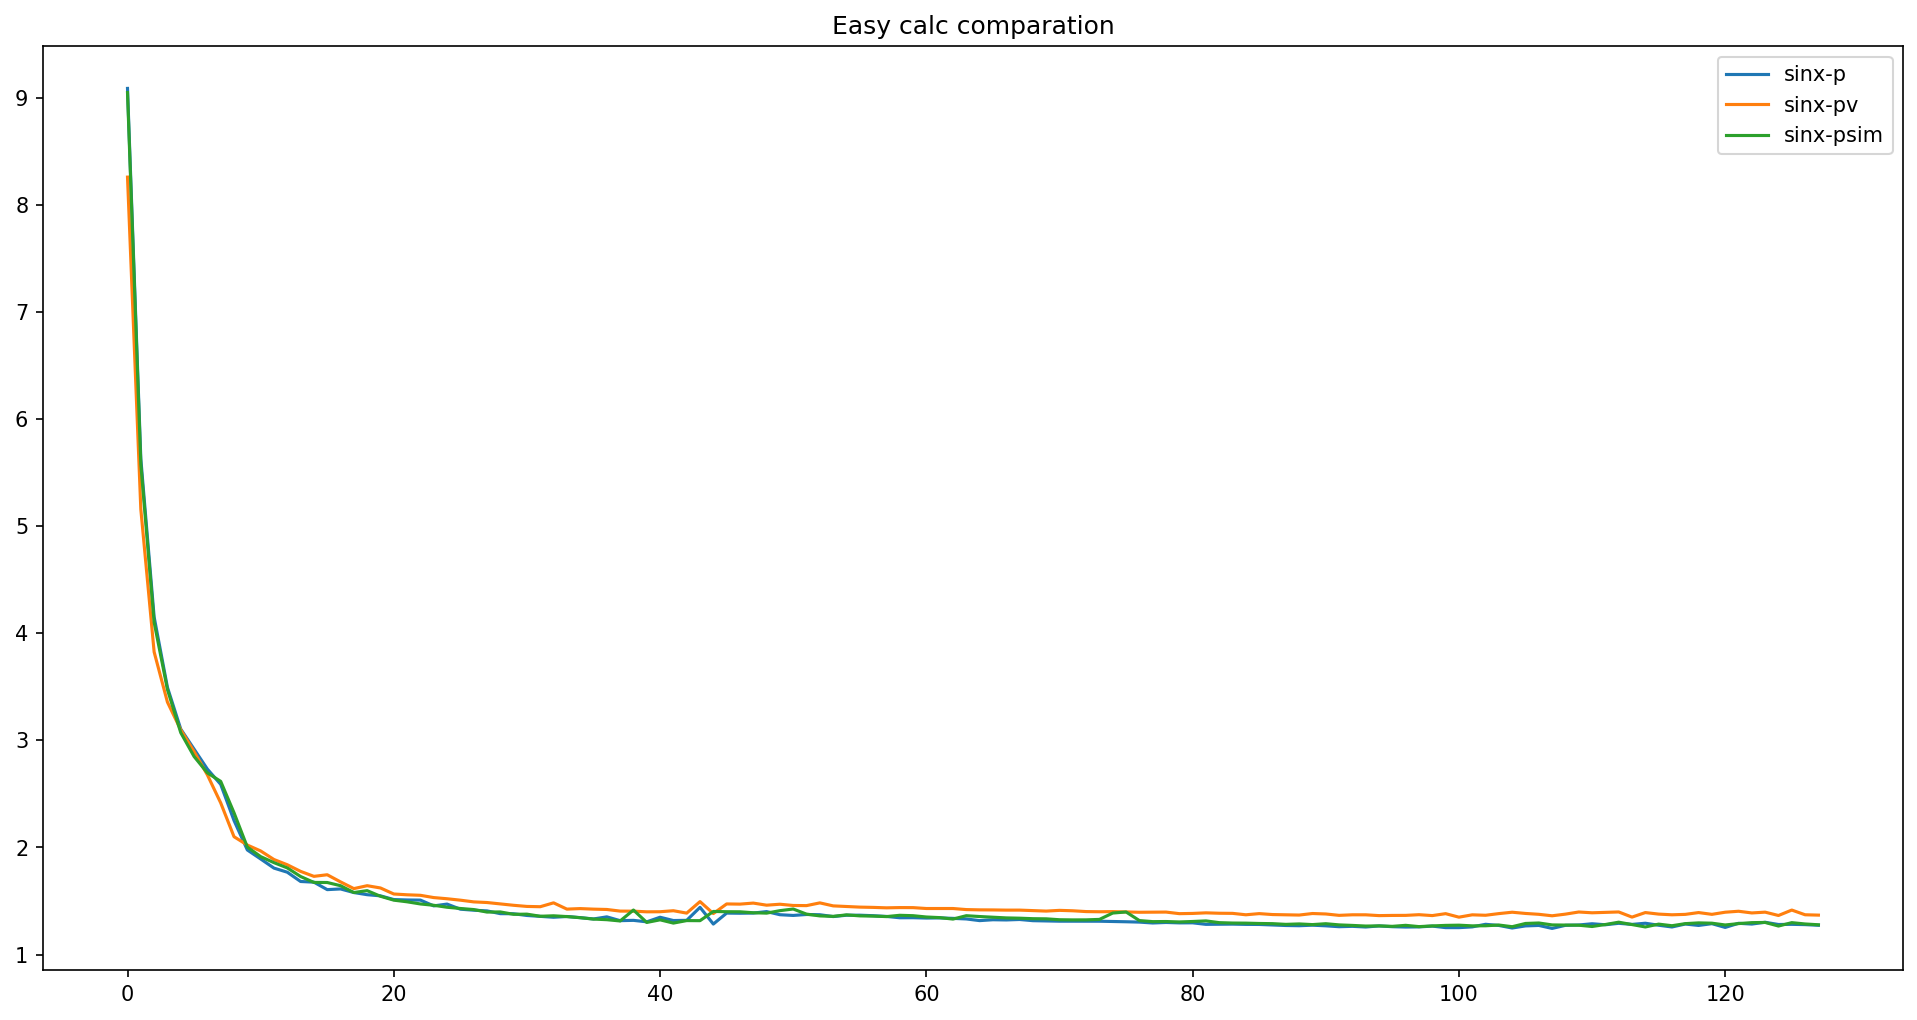

In [21]:
plt.figure(figsize=(16, 8), dpi=150)

df_p_hard_med['time'].plot(label='sinx-p')
df_pv_hard_med['time'].plot(label='sinx-pv')
df_psim_hard_med['time'].plot(label='sinx-psim')

plt.title('Easy calc comparation')
plt.legend()